In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
from matplotlib.ticker import FuncFormatter

In [2]:
# Load the dataset from the CSV file
dataset = load_dataset('csv', data_files=r'C:\Users\sami.laham\Documents\Sam\Data Analysis Training\Luke Barousse\CSV files\data_jobs.csv')

# Convert the dataset to a pandas DataFrame
df = dataset['train'].to_pandas()

# Data Cleaning: Convert the 'job_posted_date' to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
# Show the first few rows of the DataFrame to check the results
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [3]:
df_DA_Spain = df [(df['job_title_short'] == 'Data Analyst') & (df ['job_country'] == 'Spain')].copy()
df_DA_Spain = df_DA_Spain.dropna(subset = ['salary_year_avg'])

df_DA_Spain['salary_year_avg'].sample(30)

519198    118640.0
32177     111175.0
781103     98500.0
293727     57500.0
106101    111175.0
219418    155000.0
768554     89204.0
245866     89100.0
528085     89100.0
140557     89100.0
632227     53014.0
98496      80850.0
702502    111202.0
569448     56700.0
48830      80850.0
733447    105000.0
782773     98500.0
84314      57500.0
720551     57500.0
513863     72900.0
88810      98500.0
557254    111175.0
470176    111175.0
582681    111175.0
685799     94750.0
17710      51014.0
397788    111175.0
756349    100500.0
713308     89100.0
362112     89100.0
Name: salary_year_avg, dtype: float64

(0.0, 175000.0)

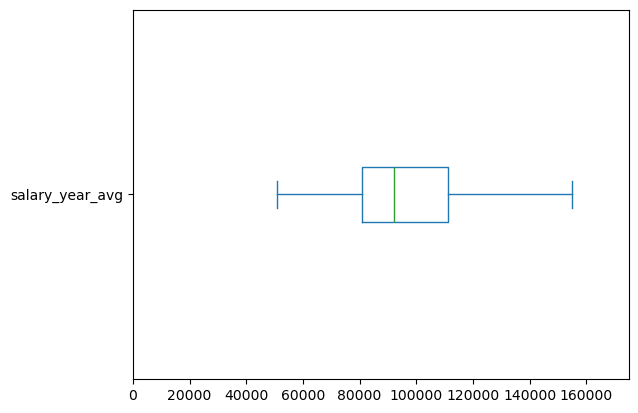

In [11]:
df_DA_Spain ['salary_year_avg'].plot(kind = 'box', vert = False)
plt.xlim(0, 175000)

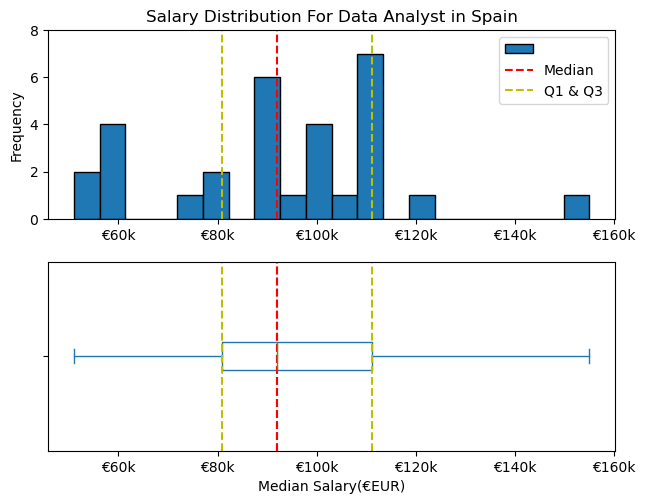

In [29]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad = 1)

df_DA_Spain ['salary_year_avg'].plot(kind= 'hist', ax=ax [0], bins = 20, edgecolor = 'black')
ax [0].set_title ('Salary Distribution For Data Analyst in Spain')
ax[0].set_xlabel ('')
ax[0].set_ylabel ('Frequency')
ax [0].xaxis.set_major_formatter (plt.FuncFormatter (lambda x, pos: '€{0:g}k'.format(x/1000)))
ax[0].set_ylim(0,8)

ax[0].axvline (df_DA_Spain['salary_year_avg'].median(), color='r', linestyle = '--')
ax[0].axvline (df_DA_Spain['salary_year_avg'].quantile(0.25), color ='y', linestyle = '--')
ax[0].axvline (df_DA_Spain['salary_year_avg'].quantile(0.75), color ='y', linestyle = '--')
ax [0].legend (['', 'Median', 'Q1 & Q3'])


df_DA_Spain ['salary_year_avg'].plot(kind = 'box', ax = ax[1], vert = False)
ax[1].set_yticklabels ('')
ax[1].set_xlabel('Median Salary(€EUR)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter (plt.FuncFormatter (lambda x, pos: '€{0:g}k'.format(x/1000)))

ax[1].axvline (df_DA_Spain ['salary_year_avg'].median(),color = 'r', linestyle ='--')
ax[1].axvline (df_DA_Spain['salary_year_avg'].median(), color='r', linestyle = '--')
ax[1].axvline (df_DA_Spain['salary_year_avg'].quantile(0.25), color ='y', linestyle = '--')
ax[1].axvline (df_DA_Spain['salary_year_avg'].quantile(0.75), color ='y', linestyle = '--')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x15b207c5ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x15b207c51c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15b207c67b0>],
 'medians': [<matplotlib.lines.Line2D at 0x15b54b35100>],
 'fliers': [<matplotlib.lines.Line2D at 0x15b54b34830>],
 'means': []}

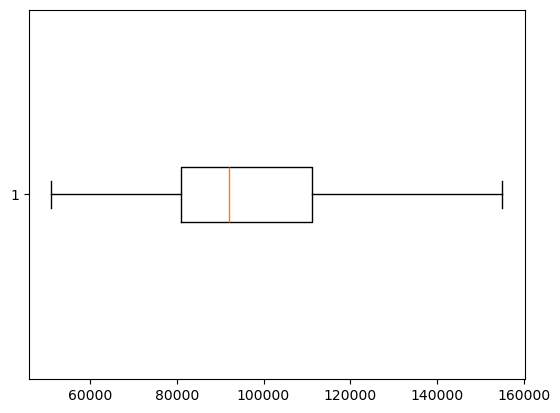

In [13]:
plt.boxplot(df_DA_Spain['salary_year_avg'], vert = False)

C:\Users\sami.laham\AppData\Local\Temp\ipykernel_11928\1071765559.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


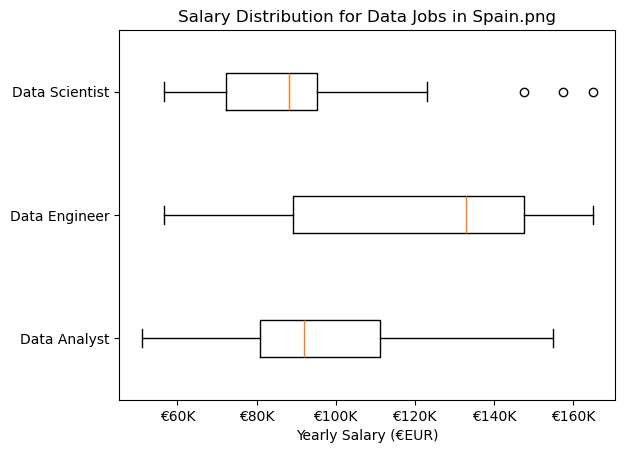

In [41]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_Spain = df [(df['job_title_short'].isin(job_titles)) & (df ['job_country'] == 'Spain')].copy()
df_Spain = df_Spain.dropna(subset = ['salary_year_avg'])
job_list = [df_Spain [df_Spain ['job_title_short'] == job_title] ['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title ('Salary Distribution for Data Jobs in Spain.png')
plt.xlabel ('Yearly Salary (€EUR)')
ax = plt.gca()
ax.xaxis.set_major_formatter (plt.FuncFormatter (lambda x, pos: f'€{int(x/1000)}K'))
                              
plt.show()

In [37]:
job_list[0]

17710      51014.0
32177     111175.0
48830      80850.0
84314      57500.0
88810      98500.0
98496      80850.0
106101    111175.0
140557     89100.0
219418    155000.0
245866     89100.0
293727     57500.0
362112     89100.0
397788    111175.0
470176    111175.0
513863     72900.0
519198    118640.0
528085     89100.0
557254    111175.0
569448     56700.0
582681    111175.0
632227     53014.0
685799     94750.0
702502    111202.0
713308     89100.0
720551     57500.0
733447    105000.0
756349    100500.0
768554     89204.0
781103     98500.0
782773     98500.0
Name: salary_year_avg, dtype: float64